In [30]:
import os
import mne
import numpy as np
import matplotlib.pyplot as plt

In [31]:
print('MNE–Python version', mne.__version__)

MNE–Python version 1.7.1


# Test on single participant, single task, single run

### define inputs

In [5]:
sub_label = '02'
task_label = 'passive'
run_label = '1'

In [32]:

data_dir = os.path.join('/Users/dsj3886/Downloads',
                        'EEG_raw')

bdf_path = os.path.join(data_dir,
                        f'sub-{sub_label}_task-{task_label}_run-{run_label}.bdf')
print(bdf_path)
#out_dir = []


/Users/dsj3886/Downloads/EEG_raw/sub-02_task-passive_run-1.bdf


### load EEG data

In [33]:
data = mne.io.read_raw_bdf(bdf_path, preload=True)

Extracting EDF parameters from /Users/dsj3886/Downloads/EEG_raw/sub-02_task-passive_run-1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 10551295  =      0.000 ...   644.000 secs...


In [34]:
print(data.info)

<Info | 8 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2024-07-18 13:00:59 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


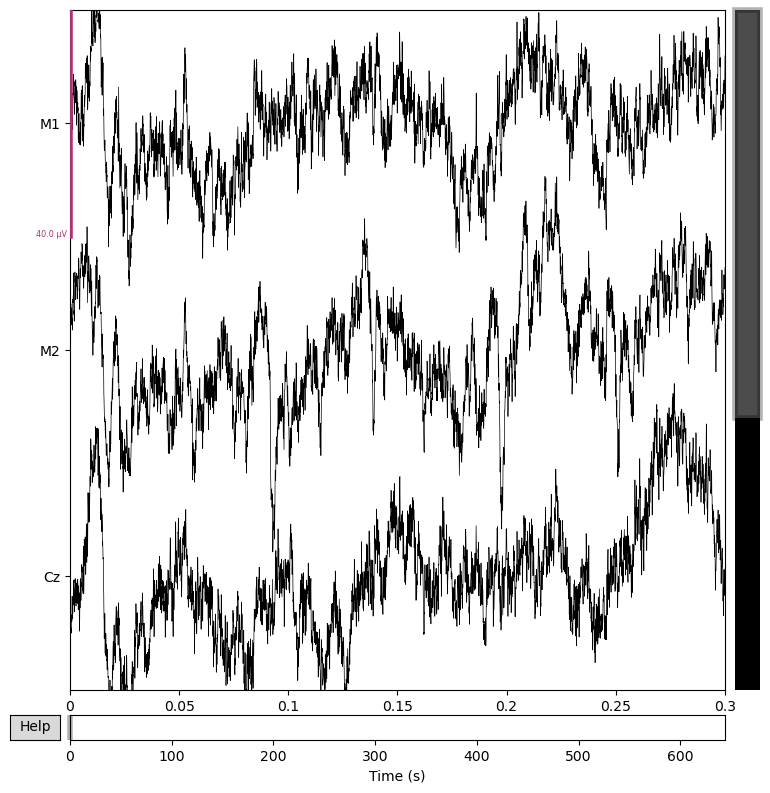

In [35]:
data.plot(duration=0.3, 
          n_channels=3,
          remove_dc=True);

### set reference channels

In [36]:
data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])

EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


In [37]:
print(data_ref.info)

<Info | 9 non-empty values
 bads: []
 ch_names: M1, M2, Cz, Erg1, Status
 chs: 4 EEG, 1 Stimulus
 custom_ref_applied: True
 highpass: 0.0 Hz
 lowpass: 3334.0 Hz
 meas_date: 2024-07-18 13:00:59 UTC
 nchan: 5
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


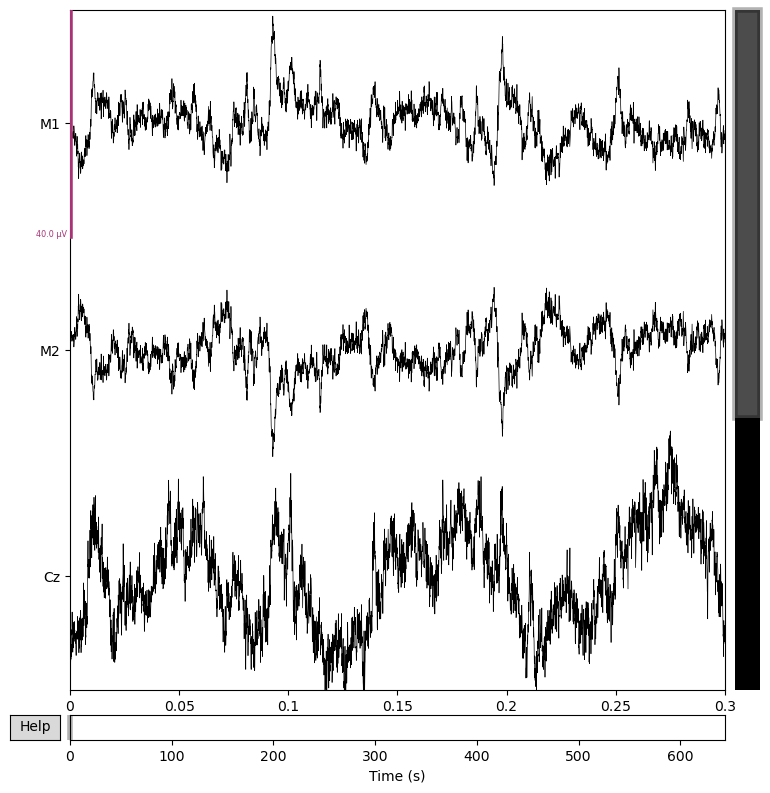

In [38]:
data_ref.plot(duration=0.3, 
              n_channels=3, 
              remove_dc=True);

### filter data

In [39]:
data_filtered = data_ref.copy().filter(l_freq = 70, h_freq = 2000)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)



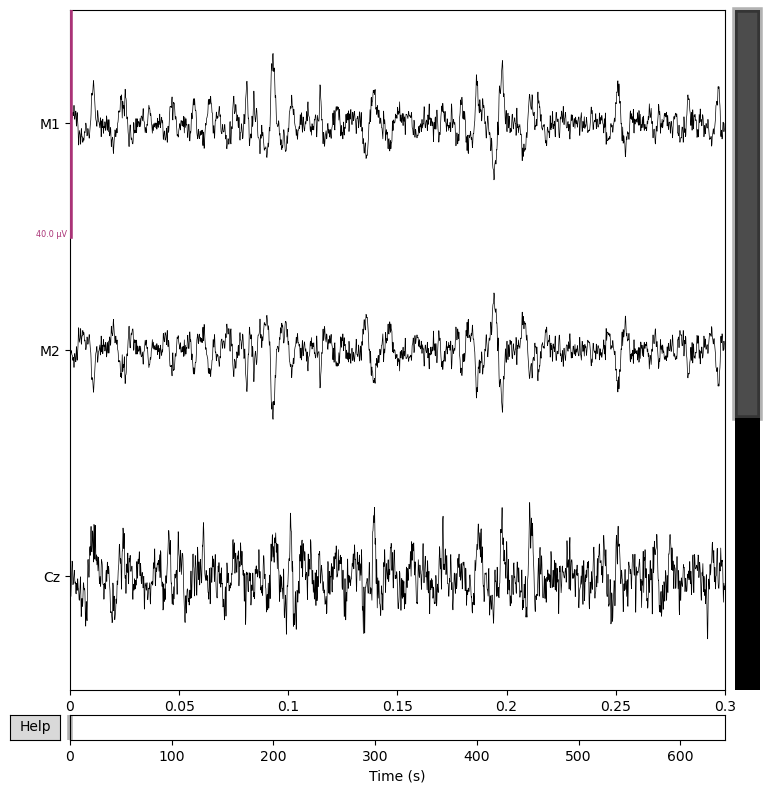

In [40]:
data_filtered.plot(duration=0.3, 
                   n_channels=3, 
                   remove_dc=True);

### Find events in the trigger channel

In [41]:
events = mne.find_events(data_filtered, 
                         stim_channel='Status', 
                         initial_event=True)

1202 events found on stim channel Status
Event IDs: [ 2049  2050  2177  2303 67584]


In [42]:
# unique_events, unique_indices, unique_inverse, count_events = 
unique, counts = np.unique(events[:,2], return_counts=True)
print(unique)
print(counts)


[ 2049  2050  2177  2303 67584]
[597 600   3   1   1]


In [43]:
for tx, trigger in enumerate(unique):
    print(f'trigger code {trigger} – {counts[tx]} events')

trigger code 2049 – 597 events
trigger code 2050 – 600 events
trigger code 2177 – 3 events
trigger code 2303 – 1 events
trigger code 67584 – 1 events


In [44]:
event_dict = {'pol_pos': 2049,
              'pol_neg': 2050,
              #'button_1': 6144,
              #'button_2': 6145,
              #'button_3': 6149,
              }

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_58322/2210850885.py:1: RuntimeWarning: event 2177 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_58322/2210850885.py:1: RuntimeWarning: event 2303 missing from event_id will be ignored
  fig = mne.viz.plot_events(
/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_58322/2210850885.py:1: RuntimeWarning: event 67584 missing from event_id will be ignored
  fig = mne.viz.plot_events(


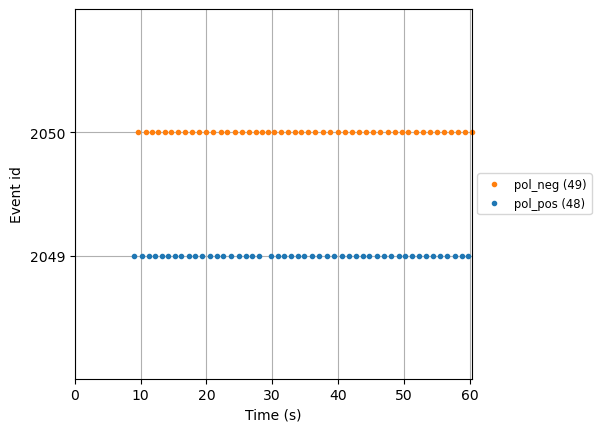

In [45]:
fig = mne.viz.plot_events(
            events[:100], event_id=event_dict, 
            sfreq=data_filtered.info["sfreq"], 
            first_samp=data_filtered.first_samp
)

### Epoch the data based on events

In [46]:
epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Cz'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    reject=dict(eeg=75e-6)).drop_bad()


Not setting metadata
1197 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1197 events and 5571 original time points ...
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
    Rejecting  epoch based on EEG : ['Cz']
10 bad epochs dropped


In [47]:
print(epochs.info)

<Info | 9 non-empty values
 bads: []
 ch_names: Cz
 chs: 1 EEG
 custom_ref_applied: True
 highpass: 70.0 Hz
 lowpass: 2000.0 Hz
 meas_date: 2024-07-18 13:00:59 UTC
 nchan: 1
 projs: []
 sfreq: 16384.0 Hz
 subject_info: 1 item (dict)
>


Using data from preloaded Raw for 5 events and 5571 original time points ...


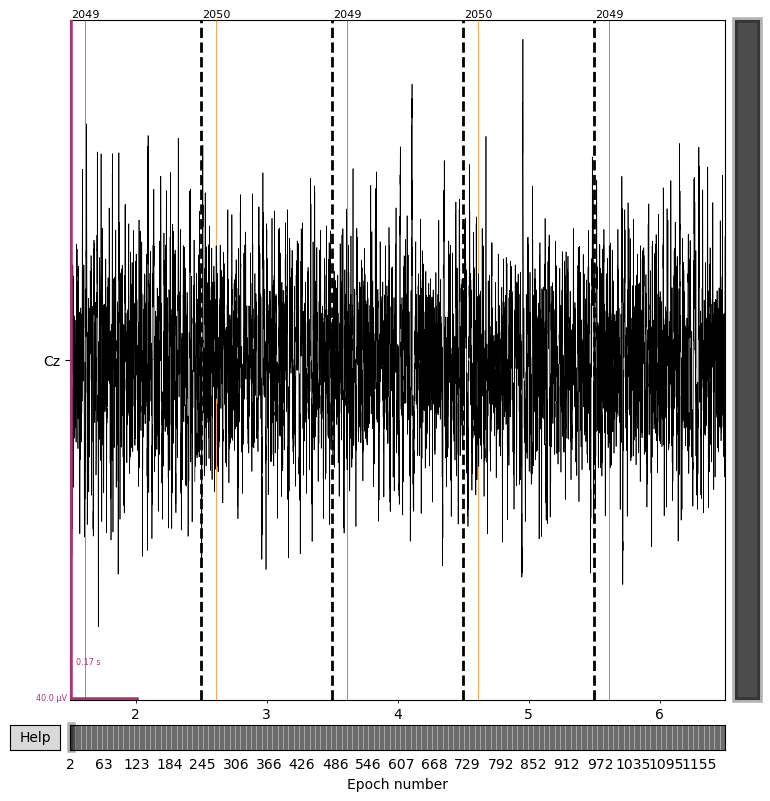

In [48]:
# plot the first few epochs
epochs.plot(n_epochs = 5, 
            events=True);

In [22]:
# save epoched data to a new file
epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)

Overwriting existing file.
Using data from preloaded Raw for 1 events and 5571 original time points ...
Overwriting existing file.
Using data from preloaded Raw for 1154 events and 5571 original time points ...


/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_15339/1753865263.py:2: RuntimeWarning: This filename (sub-02_task-motor_run-1_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-{run_label}_epochs.fif', overwrite = True)


### Created `Evoked` from `Epochs`

In [49]:
evoked = epochs.average()

In [50]:
evoked

Condition,0.50 × pol_pos + 0.50 × pol_neg
Data kind,average
Timepoints,5571 samples
Channels,1 channels
Number of averaged epochs,1187
Time range (secs),-0.03997802734375 – 0.29998779296875
Baseline (secs),-0.040 – 0.000 s


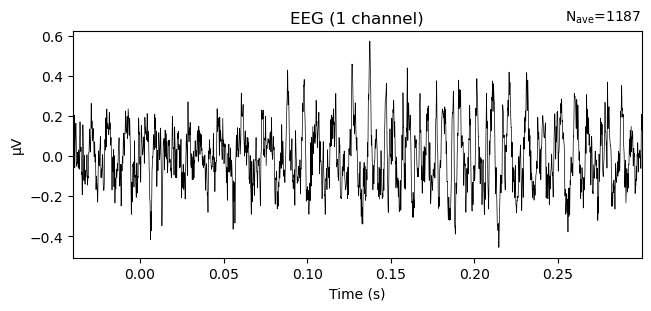

In [51]:
evoked.plot(selectable=False);

    Using multitaper spectrum estimation with 7 DPSS windows
Plotting power spectral density (dB=True).


/Users/dsj3886/miniconda3/envs/py23/lib/python3.11/site-packages/mne/viz/utils.py:167: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


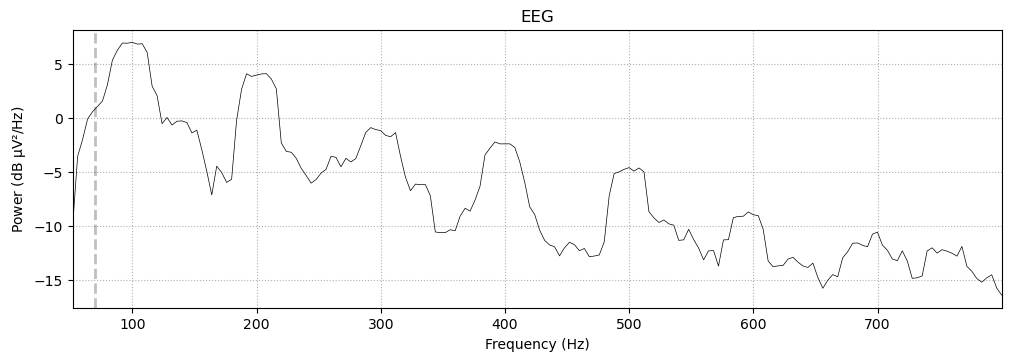

In [55]:
evoked_psd = evoked.compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
evoked_psd.plot(average=True, amplitude=False)

No baseline correction applied


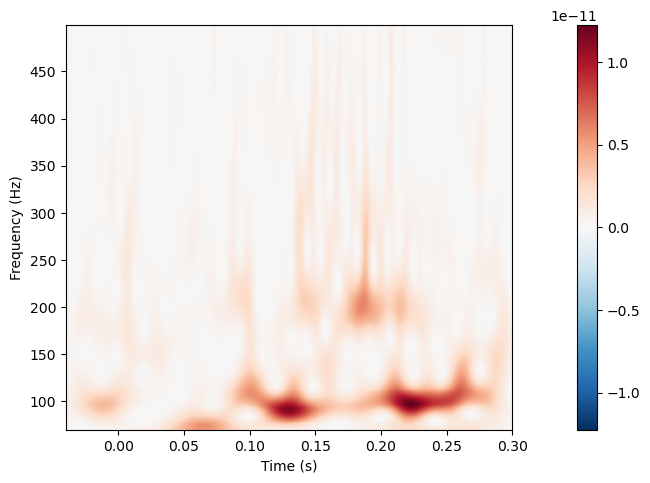

In [57]:
frequencies = np.arange(70,500)
power = evoked.compute_tfr("morlet", freqs=frequencies)
power.plot();

# Combine multiple runs

In [59]:
sub_label = '02'
task_list = ['active', 'passive', 'motor']
run_labels = ['1','2']

data_dir = os.path.join('/Users/dsj3886/Downloads',
                        'EEG_raw')

In [60]:
#for sub_label in [xxxxx]:    

# initialize an empty dictionary for data
task_evoked_dict = {}
for task_label in task_list:
    print(f'Loading {task_label} data')
    epoch_list = []

    if task_label == 'motor':
        event_dict = {'button_press/1': 6144,
                      'button_press/2': 10240,
                      'button_press/3': 18432,
                      'button_press/4': 34816}
    else:
        event_dict = {'sound/pos': 2049,
                      'sound/neg': 2050}
    for run_label in run_labels:
        try:
            print(f'Loading run {run_label}')
            # define one EEG data file path
            bdf_path = os.path.join(data_dir, f'sub-{sub_label}_task-{task_label}_run-{run_label}.bdf')
            
            # load in EEG data
            data = mne.io.read_raw_bdf(bdf_path, preload=True)
            
            # re-reference data to linked mastoid reference
            data_ref = data.set_eeg_reference(ref_channels=['M1', 'M2'])
            
            # filter data
            data_filtered = data_ref.copy().filter(l_freq = 70, h_freq = 2000)
            
            # find events
            events = mne.find_events(data_filtered, 
                                stim_channel='Status', 
                                initial_event=True)
            
            # epoch data based on stimulus events
            epochs = mne.Epochs(data_filtered, 
                            events, 
                            event_id=event_dict,
                            picks=['Cz'],
                            tmin=-0.04, tmax=0.3, 
                            baseline=[-0.04, 0],
                            reject=dict(eeg=75e-6)).drop_bad()
            
            epoch_list.append(epochs)
        except:
            print(f"No run {run_label} for task-{task_label}")
    
    # combine epochs across runs
    all_epochs = mne.concatenate_epochs(epoch_list)
    epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)
    
    # create evoked average from across-run epochs
    all_evoked = all_epochs.average()

    # add to results dict
    task_evoked_dict[task_label] = all_evoked

Loading active data
Loading run 1
Extracting EDF parameters from /Users/dsj3886/Downloads/EEG_raw/sub-02_task-active_run-1.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 16826367  =      0.000 ...  1027.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)

4946 events found on stim channel Status
Event IDs: [ 2048  2049  2050 

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_58322/2725677101.py:52: RuntimeWarning: This filename (sub-02_task-active_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)


Reading 0 ... 10551295  =      0.000 ...   644.000 secs...
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)

1202 events found on stim channel Status
Event IDs: [ 2049  2050  2177  2303 67584]
Not setting metadata
1197 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 119

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_58322/2725677101.py:52: RuntimeWarning: This filename (sub-02_task-passive_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)


EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 70 - 2e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 70.00
- Lower transition bandwidth: 17.50 Hz (-6 dB cutoff frequency: 61.25 Hz)
- Upper passband edge: 2000.00 Hz
- Upper transition bandwidth: 500.00 Hz (-6 dB cutoff frequency: 2250.00 Hz)
- Filter length: 3091 samples (0.189 s)

3640 events found on stim channel Status
Event IDs: [ 2048  2049  2303  6144  6145  6149  6277 10240 10241 10246 14337 14341
 14342 18432 18433 18439 34816 34817 34824 67584]
Not setting metadata
1230 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using

/var/folders/5g/l5zc58vs5y17h1lbzp_7g3_40000gq/T/ipykernel_58322/2725677101.py:52: RuntimeWarning: This filename (sub-02_task-motor_run-all_epochs.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  epochs.save(f'sub-{sub_label}_task-{task_label}_run-all_epochs.fif', overwrite=True)


In [61]:
task_evoked_dict

{'active': <Evoked | '1.00 × sound/pos + 0.00 × sound/neg' (average, N=2200), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
 'passive': <Evoked | '0.50 × sound/pos + 0.50 × sound/neg' (average, N=2378), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>,
 'motor': <Evoked | '0.95 × button_press/1 + 0.02 × button_press/2 + 0.02 × button_press/3 + 0.01 × button_press/4' (average, N=1214), -0.039978 – 0.29999 s, baseline -0.04 – 0 s, 1 ch, ~50 kB>}

<Figure size 640x480 with 0 Axes>

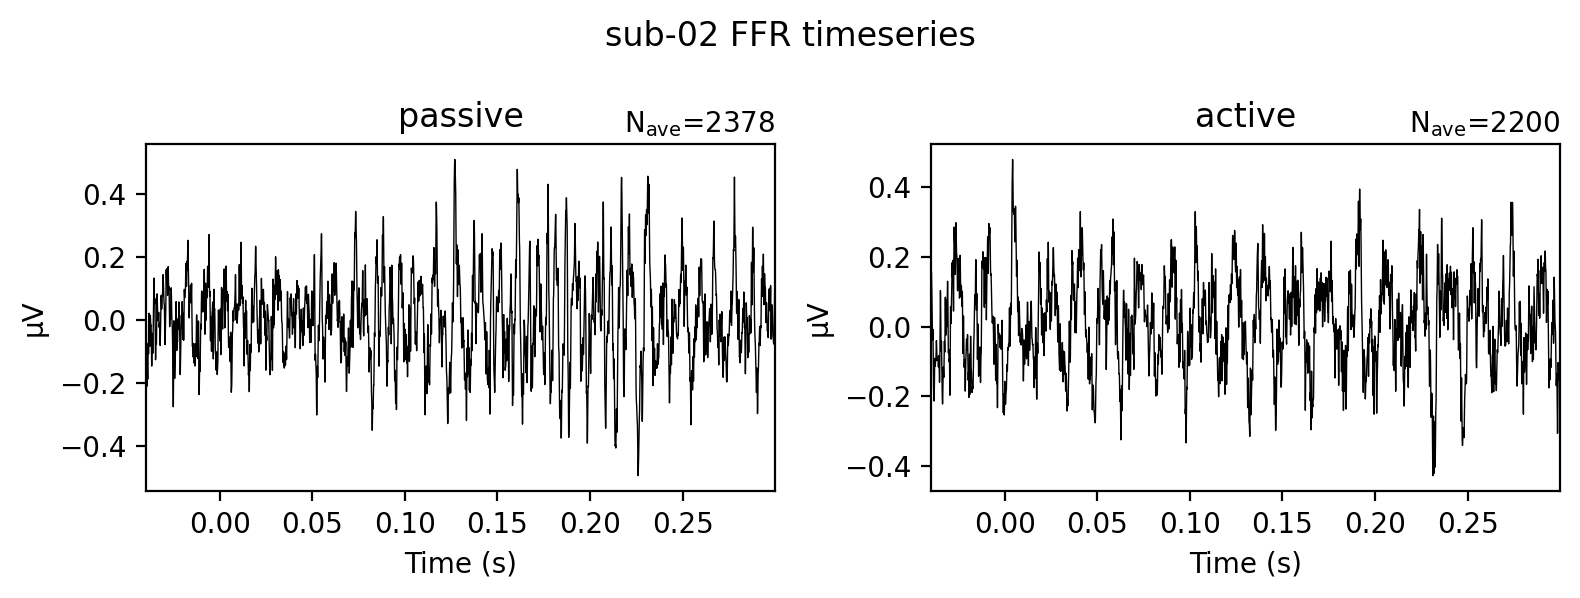

In [88]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), dpi=200)
task_evoked_dict['passive'].plot(axes=ax[0], selectable=False, show=False)
task_evoked_dict['active'].plot(axes=ax[1], selectable=False, show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR timeseries')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_timeseries.svg')

In [67]:
passive_psd = task_evoked_dict['passive'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)
active_psd = task_evoked_dict['active'].compute_psd(tmin=0.05, tmax=0.300, fmin=50, fmax=800)

    Using multitaper spectrum estimation with 7 DPSS windows
    Using multitaper spectrum estimation with 7 DPSS windows


Plotting power spectral density (dB=True).
Plotting power spectral density (dB=True).


<Figure size 640x480 with 0 Axes>

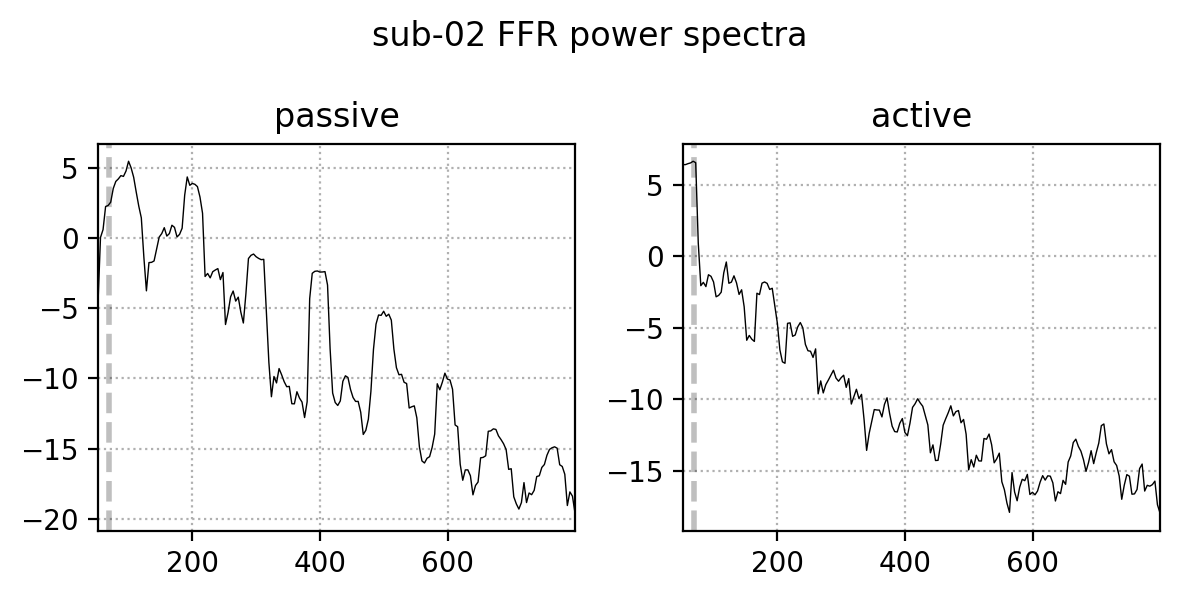

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(6,3), dpi=200)
passive_psd.plot(axes=ax[0], amplitude=False, average=True, show=False)
active_psd.plot(axes=ax[1], amplitude=False, average=True, show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR power spectra')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_spectra.svg')

In [71]:
frequencies = np.arange(70,350)
active_power =  task_evoked_dict['active'].compute_tfr("morlet", freqs=frequencies)
passive_power =  task_evoked_dict['passive'].compute_tfr("morlet", freqs=frequencies)

No baseline correction applied
No baseline correction applied


<Figure size 640x480 with 0 Axes>

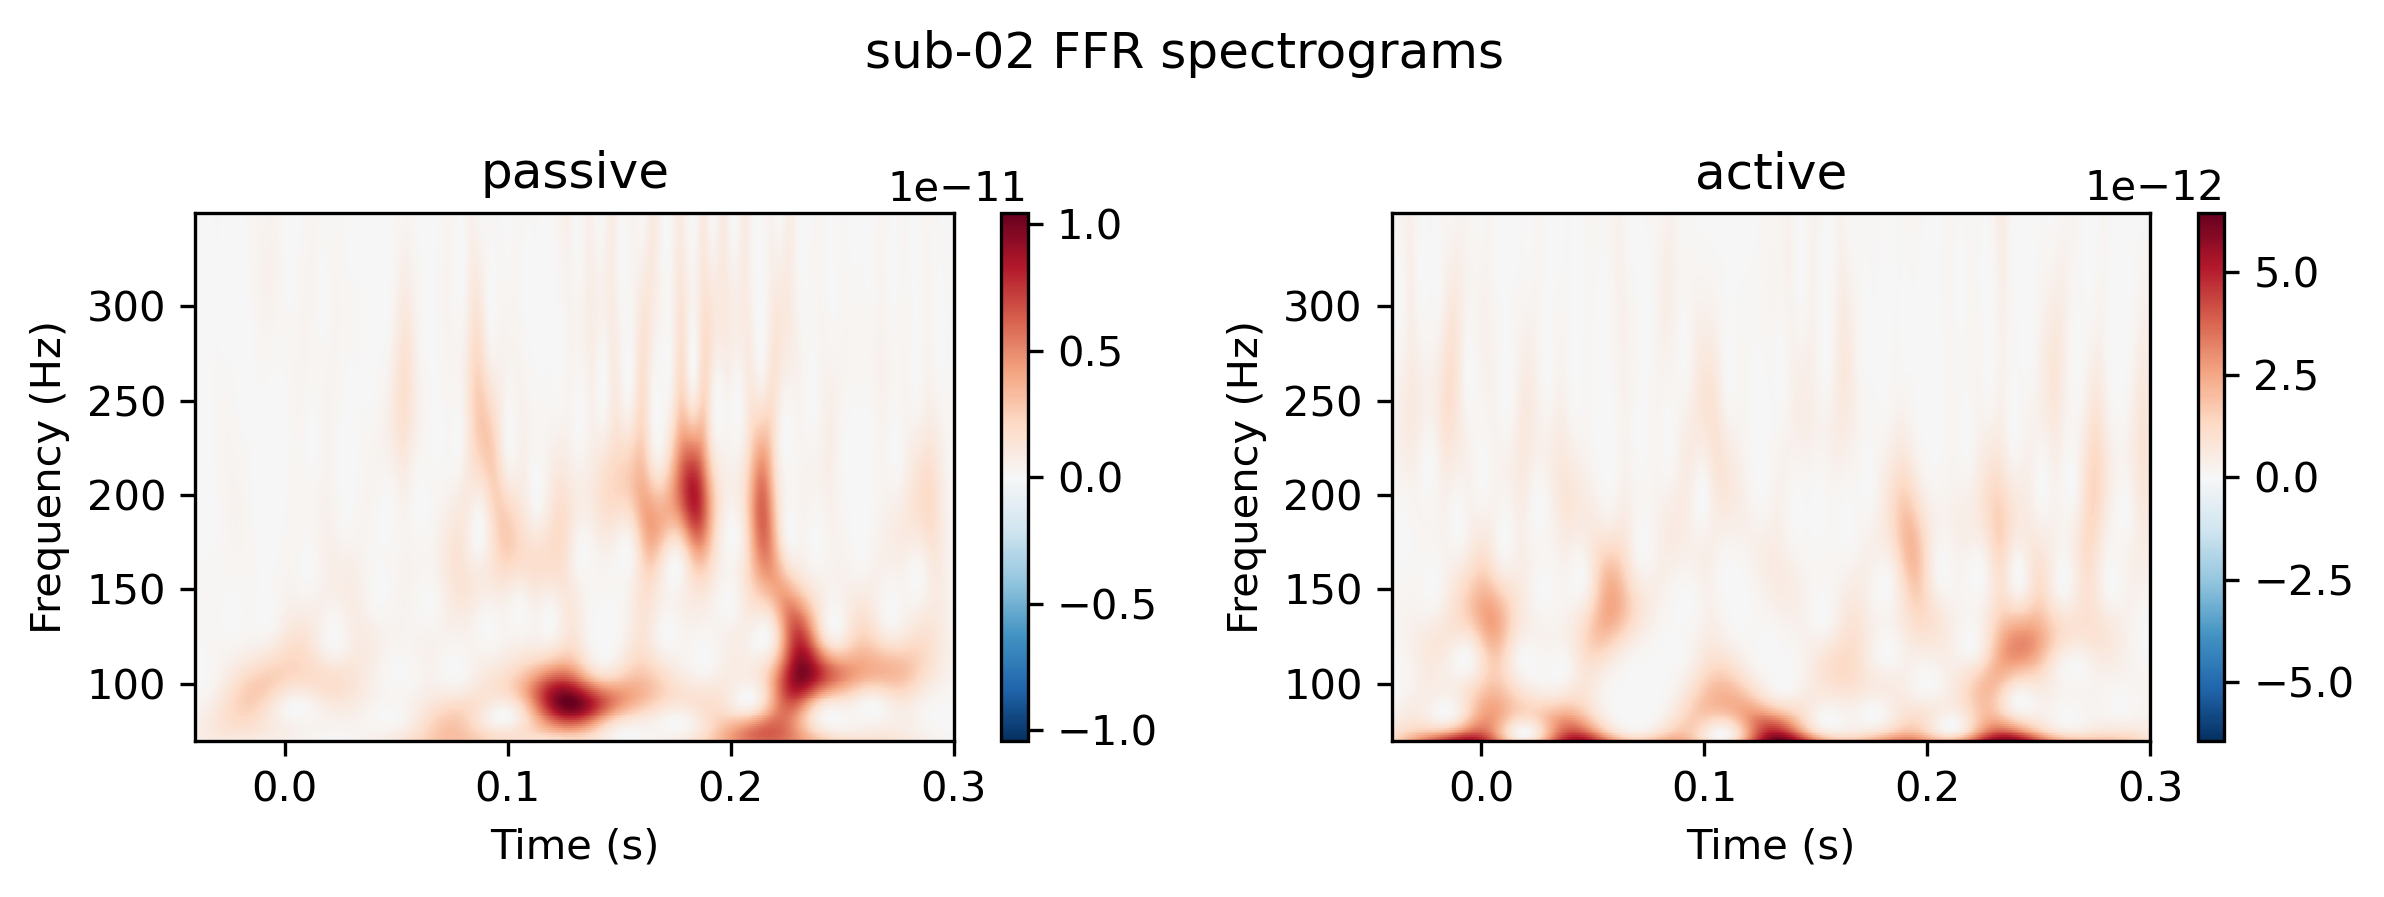

In [90]:
fig, ax = plt.subplots(1, 2, figsize=(8,3), dpi=300)
passive_power.plot(axes=ax[0], show=False)
active_power.plot(axes=ax[1], show=False)

ax[0].set_title('passive');
ax[1].set_title('active');

fig.suptitle(f'sub-{sub_label} FFR spectrograms')

fig.tight_layout()
plt.show()
plt.savefig(f'sub-{sub_label}_spectrograms.svg')

# QA and metrics

## RMS SNR

In [76]:
from numpy import mean, sqrt, square, arange

In [78]:
for sx, stim in enumerate(task_evoked_dict):
    s_evoked = task_evoked_dict[stim]
    baseline_ind_bounds = s_evoked.time_as_index(task_evoked_dict[stim].baseline)
    response_ind_bounds = s_evoked.time_as_index([0.05, 0.200])

    evoked_baseline = s_evoked.data[0,baseline_ind_bounds[0]:baseline_ind_bounds[1]]
    evoked_response = s_evoked.data[0,response_ind_bounds[0]:response_ind_bounds[1]]
    rms_baseline = sqrt(mean(square(evoked_baseline)))
    rms_response = sqrt(mean(square(evoked_response)))

    rms_snr = rms_response / rms_baseline

    print(f'{stim} RMS SNR: {rms_snr:.04f}')
print(f'\nMean RMS SNR: {rms_snr.mean():.04f}' )

active RMS SNR: 0.9412
passive RMS SNR: 1.5903
motor RMS SNR: 0.8907

Mean RMS SNR: 0.8907


## [IN PREP] Autocorrelation

In [42]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [43]:
acf, confint = sm.tsa.stattools.acf(all_evoked.data[0,:], 
                                    nlags=len(all_evoked.data[0,:])-1,
                                    alpha=.05)

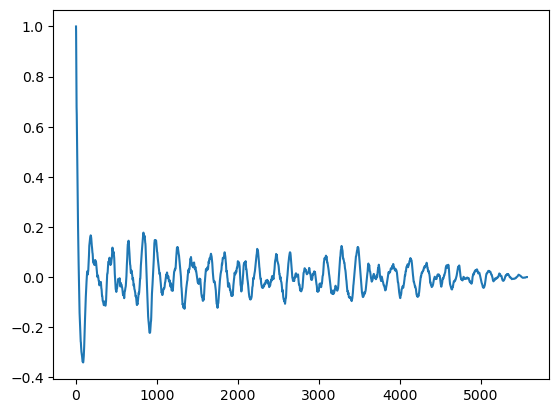

In [44]:
plt.plot(acf)
plt.show()

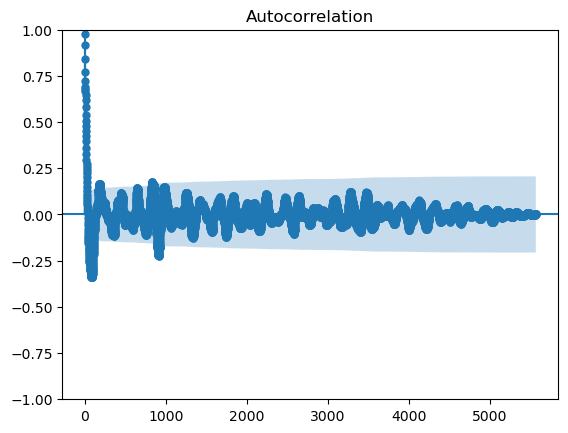

In [45]:
sm.graphics.tsa.plot_acf(all_evoked.data[0,:], 
                         lags=len(all_evoked.data[0,:])-1, 
                         zero=False,)

## [IN PREP] Stimulus–response correlations


In [46]:
data.pick(['Erg1'])

Measurement date,"July 18, 2024 13:12:19 GMT"
Experimenter,Unknown
Participant,
Digitized points,Not available
Good channels,1 EEG
Bad channels,None
EOG channels,Not available
ECG channels,Not available
Sampling frequency,16384.00 Hz
Highpass,0.00 Hz
Lowpass,3334.00 Hz


In [47]:
# epoch data based on stimulus events
stim_epochs = mne.Epochs(data_filtered, 
                    events, 
                    event_id=event_dict,
                    picks=['Erg1'],
                    tmin=-0.04, tmax=0.3, 
                    baseline=[-0.04, 0],
                    #reject = dict(eeg = 35e-6)).drop_bad()
                    reject=dict(eeg=75)).drop_bad()

Not setting metadata
1170 matching events found
Setting baseline interval to [-0.04, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1170 events and 5571 original time points ...
0 bad epochs dropped


In [48]:
stim_epochs

Number of events,1170
Events,button_press: 1170
Time range,-0.040 – 0.300 s
Baseline,-0.040 – 0.000 s


In [49]:
stim_epochs.average()

Condition,button_press
Data kind,average
Timepoints,5571 samples
Channels,1 channels
Number of averaged epochs,1170
Time range (secs),-0.03997802734375 – 0.29998779296875
Baseline (secs),-0.040 – 0.000 s


Need more than one channel to make topography for eeg. Disabling interactivity.


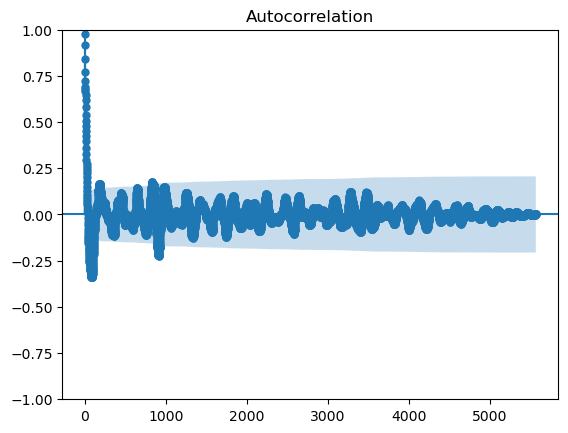

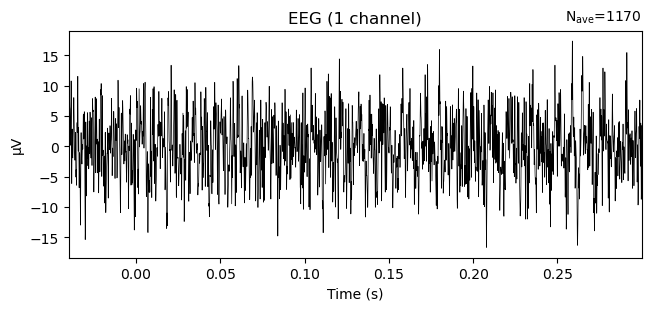

In [50]:
stim_epochs.average().plot();

In [51]:
stim_data = stim_epochs.average().get_data()[0,:]
active_data = task_evoked_dict['active'].get_data()[0,:]
passive_data = task_evoked_dict['passive'].get_data()[0,:]

In [78]:
np.array(range(len(stim_data)))

array([   0,    1,    2, ..., 5568, 5569, 5570])

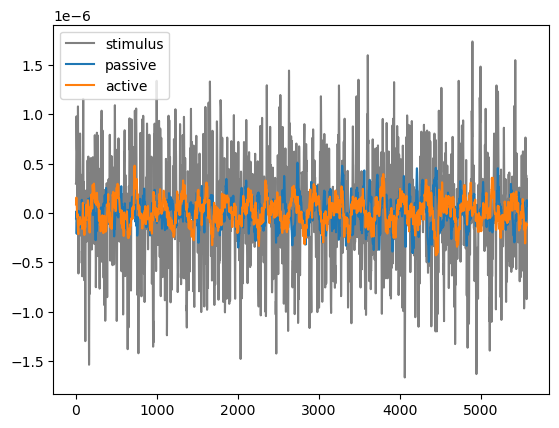

In [86]:
plt.plot(stim_data/10, color='grey')
plt.plot(passive_data)
plt.plot(active_data)
plt.legend(['stimulus','passive','active'])
#plt.xaxis(np.array(range(len(stim_data)))/16384)
plt.show()

In [52]:
from scipy.stats import spearmanr
active_res = spearmanr(active_data, stim_data, alternative='greater')
passive_res = spearmanr(passive_data, stim_data, alternative='greater')


In [53]:
active_res

SignificanceResult(statistic=0.013488523482214512, pvalue=0.15706554806619186)

In [54]:
passive_res

SignificanceResult(statistic=-0.0022353155565718644, pvalue=0.5662381718955769)